In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
import pandas as pd
import os
try:
    df = pd.read_json('train.json')
    print(df)
except ValueError as e:
    print(f"Error reading JSON: {e}")
    if not os.path.exists('train.json'):
        print("The file 'train.json' does not exist.")
    else:
        with open('train.json', 'r') as f:
            content = f.read()
            print("File content:\n", content)

          id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]


In [9]:
#Data Engineering
nb = MultinomialNB()
dtc = DecisionTreeClassifier()

dc = ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian',
 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole',
 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']

print(df["cuisine"].unique())
x = df['ingredients']
y = df['cuisine'].apply(dc.index)

df['all_ingredients'] = df['ingredients'].map(';'.join)

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


<ipython-input-12-41e46b35789c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cuisine', data=df, palette='Set3')


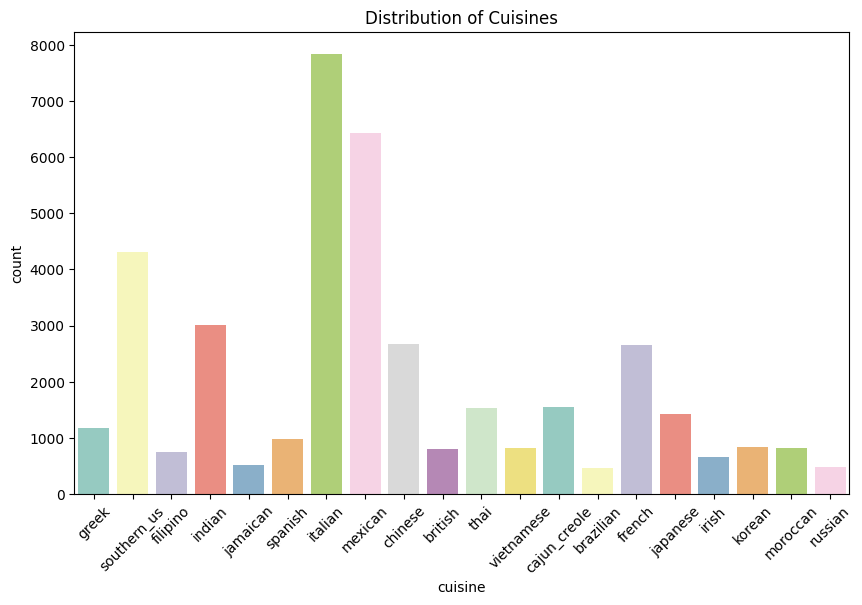

In [12]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine', data=df, palette='Set3')
plt.title('Distribution of Cuisines')
plt.xticks(rotation=45)
plt.show()

In [14]:
#Model implementation
cv = CountVectorizer()
x = cv.fit_transform(df['all_ingredients'])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

dtc.fit(x_train, y_train)
y_dtc = dtc.predict(x_test)

nb.fit(x_train, y_train)
y_nb = nb.predict(x_test)

print("Decision Tree:", accuracy_score(y_test, y_dtc))
print("Naive Bayes:", accuracy_score(y_test, y_nb))

Decision Tree: 0.6390949088623508
Naive Bayes: 0.7323695788812068
